In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
import seaborn as sn
import sklearn.metrics as metrics
from sklearn.metrics import f1_score,roc_auc_score,precision_recall_curve,recall_score,roc_curve,accuracy_score,precision_score,classification_report,confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#PLEASE CHECK LOCATION BEFORE RUNNING
X_domain = pd.read_csv("X_domain.csv")
X_anova = pd.read_csv("X_anova.csv")
Y = pd.read_csv("Y.csv")

In [ ]:
X_domain.drop(labels="Unnamed: 0",axis=1,inplace=True)
X_anova.drop(labels="Unnamed: 0",axis=1,inplace=True)
Y.drop(labels="Unnamed: 0",axis=1,inplace=True)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_domain_train, X_domain_test, y_domain_train, y_domain_test = train_test_split(X_domain,Y, test_size=0.25, random_state=42)

X_anova_train, X_anova_test, y_anova_train, y_anova_test = train_test_split(X_anova,Y, test_size=0.25, random_state=50)

In [ ]:
def our_results(X_train,X_test,y_train,y_test,y_pred):
    Y_pred = [1 if i >0.5 else 0 for i in y_pred]
    print("========================")
    print("==========BEFORE THRESHOLD==============")
    results(y_test,Y_pred)
    fpr,tpr, thresholds = roc_curve(y_test,y_pred)
    score= roc_auc_score(y_test, Y_pred)
    threshold_ROC=Find_Optimal_CutoffROC(tpr,fpr,y_pred,thresholds)
    precision, recall, th = precision_recall_curve(y_test, y_pred)
    threshold_PR=Find_Optimal_CutoffPR(precision,recall,th,y_test)
    print("========================")
    print('ROC AUC score:',score)
    print("Threshold for ROC: ",threshold_ROC)
    print("========================")
    Y_pred = [1 if i >threshold_ROC else 0 for i in y_pred]
    print("==========AFTER THRESHOLD ROC==============")
    results(y_test,Y_pred)
    print("========================")
    Y_pred = [1 if i >threshold_PR else 0 for i in y_pred]
    print("==========AFTER THRESHOLD PR CURVE==============")
    results(y_test,Y_pred)

In [ ]:
def results(y_test,y_pred):
    acc=accuracy_score(y_test, y_pred)
    pre=precision_score(y_test, y_pred)
    rec=recall_score(y_test, y_pred)
    print("========================")
    print("SCORES")
    print("Accuracy Score: ",acc)
    print("Precision Score: ",pre)
    print("Recall Score: ",rec)
    print("========================")
    df_confusion = confusion_matrix(y_test,y_pred)
    print("========================")
    print("CONFUSION Matrix")
    print(df_confusion)
    print("========================")   
    print(classification_report(y_test,y_pred))
    print("========================")
    precision, recall, th = precision_recall_curve(y_test, y_pred)
    threshold_PR=Find_Optimal_CutoffPR(precision,recall,th,y_test)

In [ ]:
def implement_model1(model,title):
    X_train=X_anova_train
    Y_train=y_anova_train
    X_final=X_anova_test
    Y_final=y_anova_test
    model.fit(X_train,Y_train)
    Y_predicted_train=model.predict(X_train)
    Y_predicted_final=model.predict(X_final)
    
    our_results(X_train,X_final,Y_train,Y_final,Y_predicted_final)

In [ ]:
def implement_model(model,title):
    X_train=X_domain_train
    Y_train=y_domain_train
    X_final=X_domain_test
    Y_final=y_domain_test
    model.fit(X_train,Y_train)
    Y_predicted_train=model.predict(X_train)
    Y_predicted_final=model.predict(X_final)

    our_results(X_train,X_final,Y_train,Y_final,Y_predicted_final)

## ANOVA FEATURES

### Random forest



In [ ]:
# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

# gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
# bestF = gridF.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.9724340175953079
Precision Score:  0.9
Recall Score:  0.16363636363636364
CONFUSION Matrix
[[1649    1]
 [  46    9]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1650
         1.0       0.90      0.16      0.28        55

    accuracy                           0.97      1705
   macro avg       0.94      0.58      0.63      1705
weighted avg       0.97      0.97      0.96      1705

Best Threshold Precision-Recall Curve=1.000000, F-Score=0.277


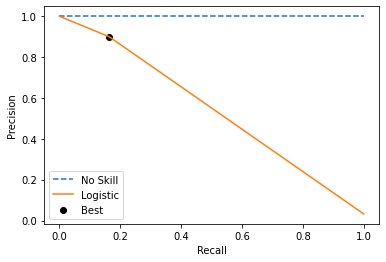

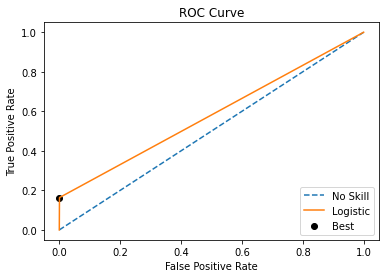

Best Threshold Precision-Recall Curve=1.000000, F-Score=0.277


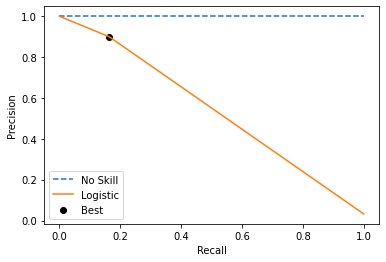

ROC AUC score: 0.5815151515151515
Threshold for ROC:  1.0
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.967741935483871
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
[[1650    0]
 [  55    0]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1650
         1.0       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705

Best Threshold Precision-Recall Curve=0.000000, F-Score=0.062


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


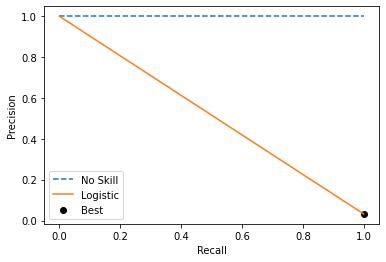

==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.967741935483871
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
[[1650    0]
 [  55    0]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1650
         1.0       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705

Best Threshold Precision-Recall Curve=0.000000, F-Score=0.062


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


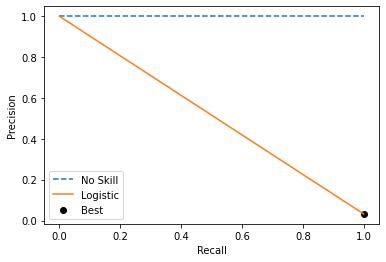

In [ ]:
final_model1 =  RandomForestClassifier(n_estimators = 100, bootstrap='False',max_depth=6,max_features=6,min_samples_leaf=2,min_samples_split=2,max_samples=0.2,max_leaf_nodes=200,random_state=200)
implement_model1(final_model1,'final')

### Extra Trees model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.9618768328445748
Precision Score:  0.3684210526315789
Recall Score:  0.2545454545454545
CONFUSION Matrix
[[1626   24]
 [  41   14]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1650
         1.0       0.37      0.25      0.30        55

    accuracy                           0.96      1705
   macro avg       0.67      0.62      0.64      1705
weighted avg       0.96      0.96      0.96      1705

Best Threshold Precision-Recall Curve=1.000000, F-Score=0.301


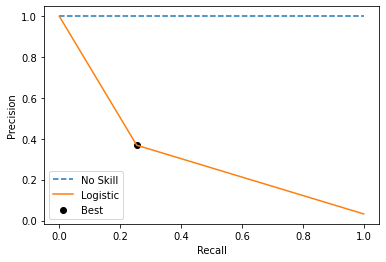

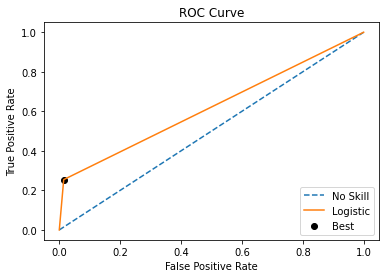

Best Threshold Precision-Recall Curve=1.000000, F-Score=0.301


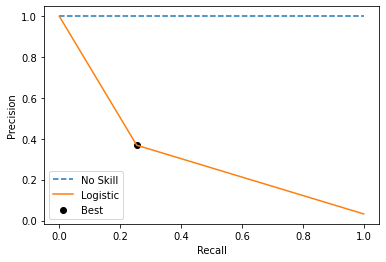

ROC AUC score: 0.6199999999999999
Threshold for ROC:  1.0
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.967741935483871
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
[[1650    0]
 [  55    0]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1650
         1.0       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705

Best Threshold Precision-Recall Curve=0.000000, F-Score=0.062


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


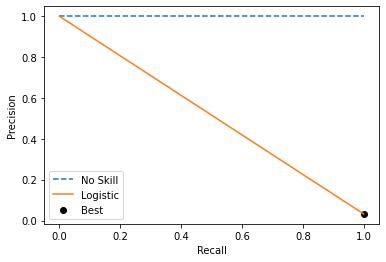

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.967741935483871
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
[[1650    0]
 [  55    0]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1650
         1.0       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705

Best Threshold Precision-Recall Curve=0.000000, F-Score=0.062


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


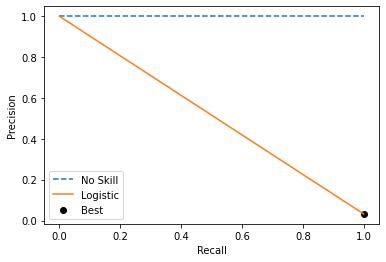

In [ ]:
# Extra Trees
etc_model = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
implement_model1(etc_model,'etc')

## DOMAIN FEATURES

### Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.9706744868035191
Precision Score:  1.0
Recall Score:  0.13793103448275862
CONFUSION Matrix
[[1647    0]
 [  50    8]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1647
         1.0       1.00      0.14      0.24        58

    accuracy                           0.97      1705
   macro avg       0.99      0.57      0.61      1705
weighted avg       0.97      0.97      0.96      1705

Best Threshold Precision-Recall Curve=1.000000, F-Score=0.242


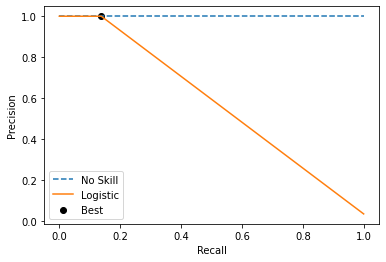

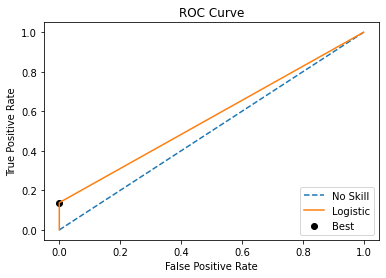

Best Threshold Precision-Recall Curve=1.000000, F-Score=0.242


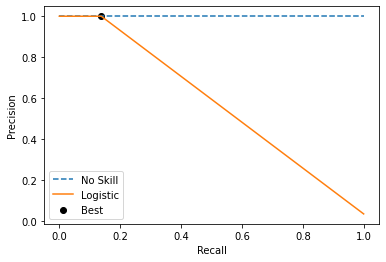

ROC AUC score: 0.5689655172413793
Threshold for ROC:  1.0
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.9659824046920821
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
[[1647    0]
 [  58    0]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1647
         1.0       0.00      0.00      0.00        58

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.93      0.97      0.95      1705

Best Threshold Precision-Recall Curve=0.000000, F-Score=0.066


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


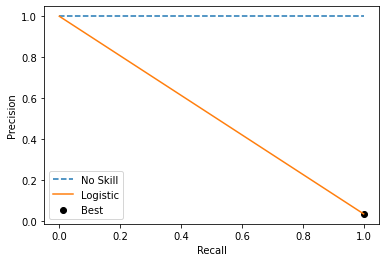

==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.9659824046920821
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
[[1647    0]
 [  58    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1647
         1.0       0.00      0.00      0.00        58

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.93      0.97      0.95      1705

Best Threshold Precision-Recall Curve=0.000000, F-Score=0.066


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


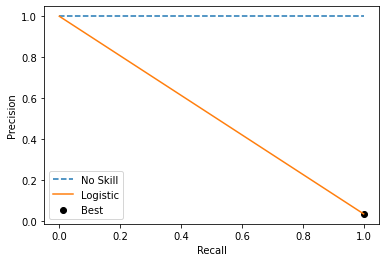

In [ ]:
final_model =  RandomForestClassifier(n_estimators = 2500, bootstrap='False',max_depth=1000,max_features=2,min_samples_leaf=1,min_samples_split=2,max_samples=0.2,max_leaf_nodes=280)
implement_model(final_model,'final')

### Extra Trees Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.9642228739002933
Precision Score:  0.43478260869565216
Recall Score:  0.1724137931034483
CONFUSION Matrix
[[1634   13]
 [  48   10]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1647
         1.0       0.43      0.17      0.25        58

    accuracy                           0.96      1705
   macro avg       0.70      0.58      0.61      1705
weighted avg       0.95      0.96      0.96      1705

Best Threshold Precision-Recall Curve=1.000000, F-Score=0.247


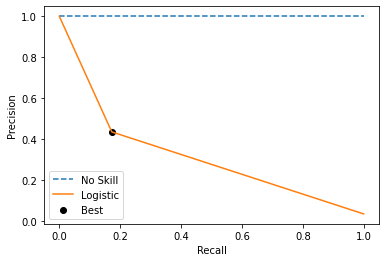

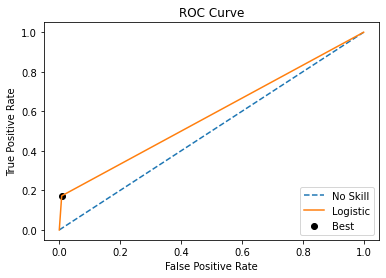

Best Threshold Precision-Recall Curve=1.000000, F-Score=0.247


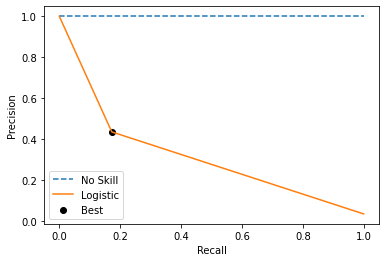

ROC AUC score: 0.5822603270313842
Threshold for ROC:  1.0
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.9659824046920821
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
[[1647    0]
 [  58    0]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1647
         1.0       0.00      0.00      0.00        58

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.93      0.97      0.95      1705

Best Threshold Precision-Recall Curve=0.000000, F-Score=0.066


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


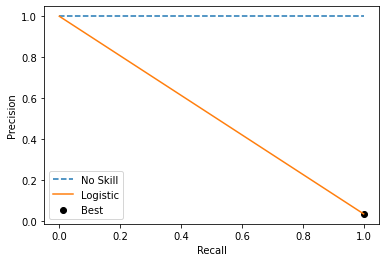

==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.9659824046920821
Precision Score:  0.0
Recall Score:  0.0
CONFUSION Matrix
[[1647    0]
 [  58    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1647
         1.0       0.00      0.00      0.00        58

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.93      0.97      0.95      1705

Best Threshold Precision-Recall Curve=0.000000, F-Score=0.066


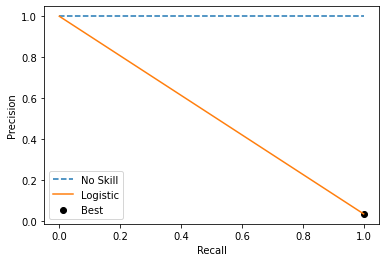

In [ ]:
etc_model = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
implement_model(etc_model,'etc')